# BASICS OF MOBILE ROBOTICS
## BOMR Project

This project was made by the Group 31, made up of the following people:

### Axel Béguelin, Lou De Bel-Air, Robin Carlet, Robin Junod.

For this project of mobile robotics, we were asked to use a Thymio II robot, a camera and our project had to use the following concepts:

- Vision
- Global Navigation
- Motion Control
- Filtering
- Local Navigation

Just a quick resume of the robot. Thymio II is an educational robot in the 100 Euros price range. The robot was developed at the EPFL in collaboration with ECAL, both in Lausanne, Switzerland (wiki source). This robot has the following features:

- 2 DC-motors (and 2 Wheels)
- 39 leds
- 1 loud speaker

and has the following sensor:
- 9 infrared (IR) proximity sensors (reach about 10cm)
- 5 capacitive touch buttons
- 1 three-axis accelerometer
- 1 thermometer
- 1 microphone (recording or detection of noise)
- 1 IR receiver (for remote controller)
- 1 Wireless module

![SNOWFALL](img_presentation/img_thymio.png)

# Introduction of our project

We decided to choose this project with the following setup. The goal of the thymio is to go from any position on a map to an objective. The emplacement of the obstacles, the goal and the initial position of the Thymio can be modified before running the code.
Even if new obstacles are added on the setup after the execution of the code, the robot is able to attain the goal by evitating them using local navigation.

Picture of the setup

The goal and the obstacles for the global navigation are in two dimensions. Having different forms and colors allow the computer vision to distinguish the different objects.
We put two green dots on the robot. They make Thymio more distinguishable, and it is therefore easier to extract its position and angle.

The obstacles for local navigation are in three dimensions, such that they can be detected by the horizontal proximity sensors.


## MOTION CONTROL

For the motion control, we used a PID controller that was used to smooth the robot trajectory. This PID controller is working on the angle error between the direction of the robot and the goal direction. A PI controller would have been probabely sufficiant but we decided to use a PID to have more freedom for the tuning.

This PID controller is comparing the angle error and give as output a 'rotation' delta speed. This rotation speed will then be add/substated to the left and right motor speed. To have something has bellow:
<div>
<img src="img_presentation/pid_resume.png" width="300"/>
</div>

For the computation of the angle error, we need the follwing information:
- robot position
- angle of the robot
- goal position

We represent the postion in the classical cartesian coordinates (x,y). The angle of the thymio(alpha) and the angle of the goal(alpha_goal) as 'absolut angle'. The vector (1,0) has the angle 0 (the vector (0,1) as the angle pi/2 etc...). The angle is negative in clockwise direction. The angle error is always represented in the range : [-pi , pi], This way, the PID controller is easy to implement. The image below is presenting the general idea of the PID implementation:

<div>
<img src="img_presentation/PID_details.png" width="500"/>
</div>

The motion control part is made in a class of .py file. For further information, go look at the script: functiion.MotionControl.py.

In [9]:
import function.MotionControl as MotionControl
import matplotlib.pyplot as plt
import math

C:\Users\Robin\AppData\Local\Temp\ipykernel_12920\2648113115.py:53: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['Thymio trajectry', None, None,'objective path', 'Thymio starting direction'], handles=[traj, path, angle])


AttributeError: 'list' object has no attribute 'get_label'

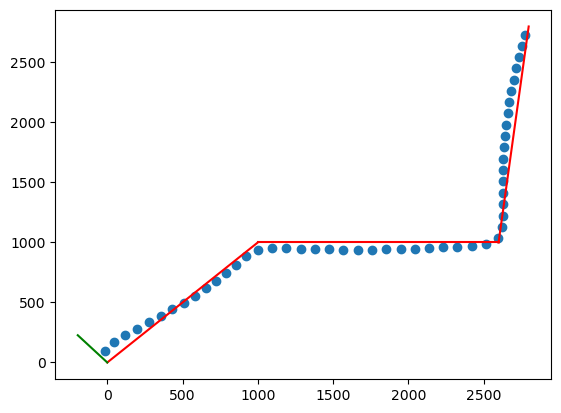

In [22]:
# Here is an exemple trajectory of the implemetation of the PID without the filtered feedback about the position and angle.
# For this exemple, we take only the 

goals_list = [(1000,1000), (2600,1000),(2800,2800)]
n_goal = 0
goal_pos = list(goals_list[n_goal])

init_robot_angle = -4
robot_speed = [100,100]
robot_angle = -4
robot_pos = [0,0]

d_time = 3
thymio_trajectory = []

# Create PID controller
PID = MotionControl.MotionControl()
PID.update_angle_error(robot_angle, robot_pos, goals_list[n_goal])
# loop
loop = 0
while True:
    loop += 1
    goal_achieved = False
    # compute error
    PID.update_angle_error(robot_angle, robot_pos, goal_pos)
    # compute PID speed
    [robot_speed[0], robot_speed[1]] = PID.PID(d_time, 100, 100)
    # set speed and get new position and angle value
    [robot_pos[0], robot_pos[1], robot_angle] = PID.plant(robot_speed[0], robot_speed[1], robot_pos[0], robot_pos[1], robot_angle, d_time)
    thymio_trajectory.append((robot_pos[0], robot_pos[1]))
    
    # Check proximity
    manathan_dist_to_goal = abs(goal_pos[1]-robot_pos[1]) + abs(goal_pos[0]-robot_pos[0])
    if manathan_dist_to_goal < 200 or loop > 300:
        n_goal += 1
        if n_goal < len(goals_list):
            goal_pos = list(goals_list[n_goal])
            # reset integral value
            PID.PID_integral = 0
        else:
            break

# plot trajectorie
plt.scatter(*zip(*thymio_trajectory), label='traj')

# Plot objective 'path'
plt.plot([0,goals_list[0][0]], [0,goals_list[0][1]], color = 'red', linestyle = 'solid', label='path')
plt.plot([goals_list[0][0],goals_list[1][0]], [goals_list[0][1],goals_list[1][1]], color = 'red', linestyle = 'solid')
plt.plot([goals_list[1][0],goals_list[2][0]], [goals_list[1][1],goals_list[2][1]], color = 'red', linestyle = 'solid')

plt.plot([0,300*math.cos(init_robot_angle)], [0, 300 * math.sin(init_robot_angle)], color = 'green', label='angle')

plt.legend(['Thymio trajectry', None, None,'objective path', 'Thymio starting direction'], handles=[traj, path, angle])

plt.title('Thymio PID direction')

# Threading and code organisation

# Odometry

# Local Navigation

For the local navigation we decided to use the approach of Artificial Neural Networks (ANN).
When an obstacle is detected we compute the speed of the motors such that the robot turn and is not anymore in front of the robot.

Then it go straight (pas vraiment straight), pour s'eloigner de l'obstacle. Then it goes back it the main loop, to recompute the new trajectory to go to next point.